**Integrating Machine Learning and Statistical Analysis to Uncover Predictors of Mortality in Heart Failure Patients**

Background: 
The utilized dataset file is from a study conducted by Dr. Davide Chicco and Dr. Giuseppe Jurman [(Chicco and Jurman., 2020)](https://bmcmedinformdecismak.biomedcentral.com/articles/10.1186/s12911-020-1023-5#availability-of-data-and-materials). The study conducted by the experts utilized statistical and machine learning methodologies to predict heart failure patients' survival and identify important risk factors from medical records. Heart failure is a global public health issue, leading to significant mortality and morbidity worldwide. Recent advancements in machine learning and statistical analysis have opened new avenues for predicting patient outcomes in heart failure, enabling healthcare providers to identify at-risk individuals more accurately and tailor treatment strategies accordingly. The integration of these analytical methods with clinical data offers a promising approach to enhancing patient care and management


Objective:
We want to explore and utilize the synergy between machine learning and  statistical methods to identify and evaluate the clinical predictors of mortality in heart failure patients. By examining a comprehensive dataset of heart failure clinical records, this analysis aims to uncover insights into the factors that significantly influence patient survival outcomes.




Data Description (Summary)

The dataset under analysis contains the clinical records of 299 heart failure patients, encompassing a wide range of clinical features such as age, anaemia, creatinine phosphokinase, diabetes, ejection fraction, high blood pressure, platelets, serum creatinine, serum sodium, sex, smoking status, and follow-up time. These records have been collected to study the follow-up period during which the mortality (death event) of the patients was recorded, providing a rich source of data for predictive modeling and statistical analysis.

**Exploratory Data Analysis (EDA)**

1. Statistical Summary: We'll look at the central tendency, dispersion, and shape of the dataset's distributions.

2. Missing Values: Check for any missing values in the dataset.

3. Distribution of Key Variables: Analyze the distribution of several key variables such as age, ejection_fraction, serum_creatinine, and serum_sodium.

4.     Target Variable Distribution: Look at the distribution of the DEATH_EVENT variable to understand the balance of outcomes.

5.     Correlation Analysis: Understand how the features relate to each other and to the DEATH_EVENT.

In [37]:
# 1 
!pip install openpyxl
import pandas as pd

# Load the dataset
file_path = '/kaggle/input/heart-failure/heart_failure_clinical_records_dataset_TABLE123.xlsx'
df = pd.read_excel(file_path, engine='openpyxl')

# Display the first few rows of the dataframe
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [38]:
# 2
# Statistical summary
statistical_summary = df.describe()

# Check for missing values
missing_values = df.isnull().sum()

(statistical_summary, missing_values)


(              age     anaemia  creatinine_phosphokinase    diabetes  \
 count  299.000000  299.000000                299.000000  299.000000   
 mean    60.833893    0.431438                581.839465    0.418060   
 std     11.894809    0.496107                970.287881    0.494067   
 min     40.000000    0.000000                 23.000000    0.000000   
 25%     51.000000    0.000000                116.500000    0.000000   
 50%     60.000000    0.000000                250.000000    0.000000   
 75%     70.000000    1.000000                582.000000    1.000000   
 max     95.000000    1.000000               7861.000000    1.000000   
 
        ejection_fraction  high_blood_pressure      platelets  \
 count         299.000000           299.000000     299.000000   
 mean           38.083612             0.351171  263358.029264   
 std            11.834841             0.478136   97804.236869   
 min            14.000000             0.000000   25100.000000   
 25%            30.000000

**Statistical Summary & Missing Values**
 
Statistical Summary:
 
* The dataset contains 299 observations.
* The age of patients ranges from 40 to 95 years, with a mean age of approximately 61 years.
* creatinine_phosphokinase has a wide range, indicating variability in the enzyme levels among patients, with a mean of about 582 mcg/L.
* ejection_fraction varies from 14% to 80%, with a mean value of about 38%.
* platelets count ranges significantly, from 25,100 to 850,000 kiloplatelets/mL, with a mean of approximately 263,358 kiloplatelets/mL.
* serum_creatinine levels show variability (0.5 to 9.4 mg/dL), indicating differences in kidney function among patients.
* serum_sodium levels range from 113 to 148 mEq/L, with a mean value of approximately 137 mEq/L.
* The dataset includes more male (about 65%) than female patients.
* Around 32% of the patients have experienced the death event during the follow-up period.

Missing Values:
There are no missing values in any of the columns, indicating a complete dataset ready for further analysis.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

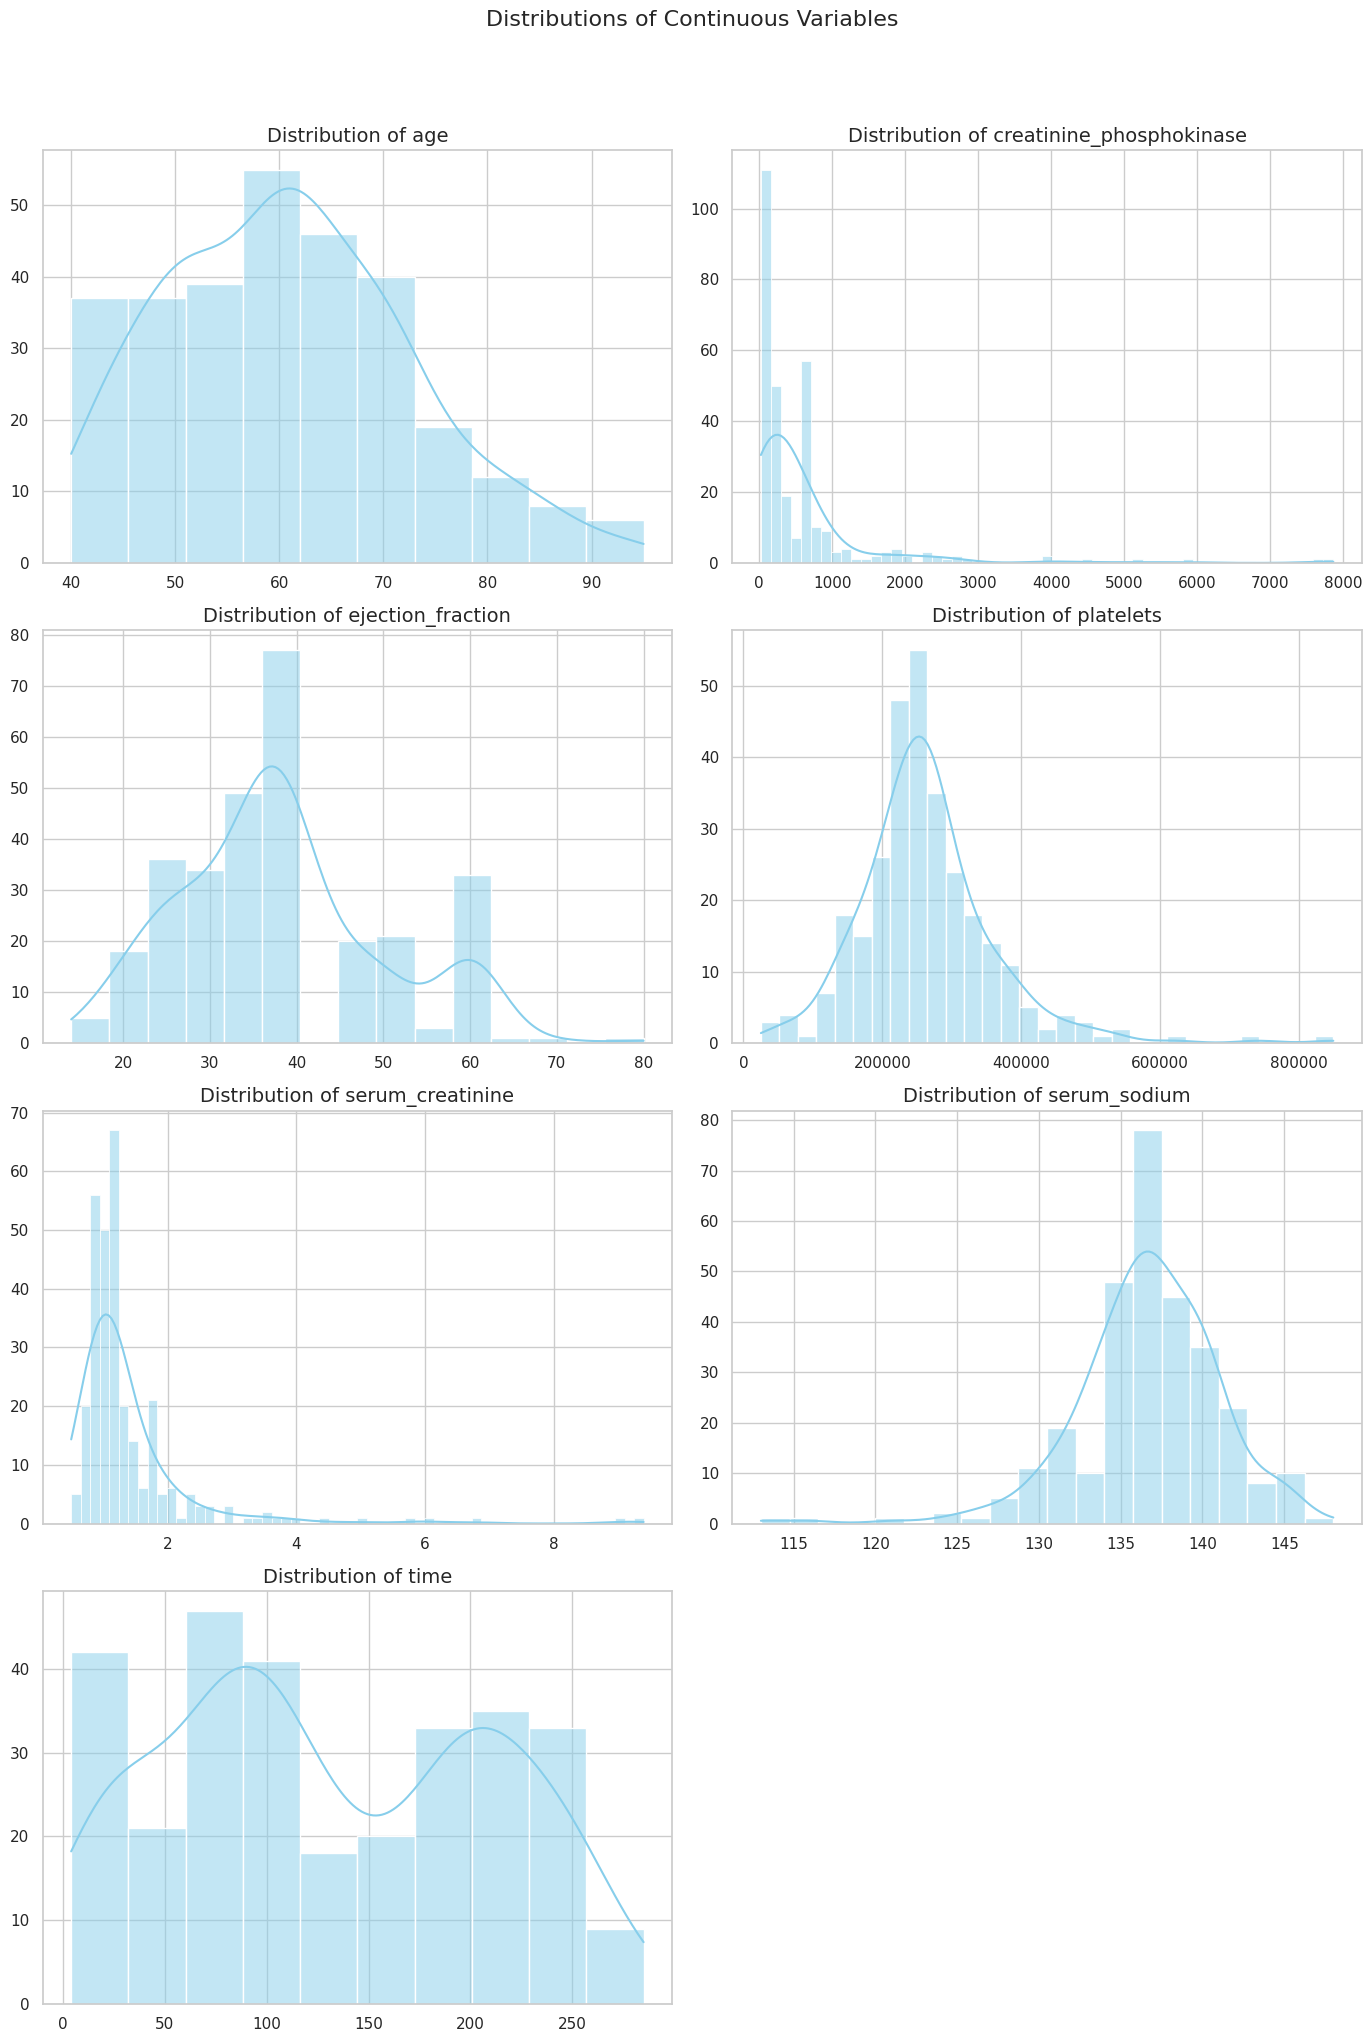

In [39]:
# 3
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Defining the list of continuous variables
continuous_variables = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']

# Plotting histograms for continuous variables
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(14, 20))
axes = axes.flatten()  # Flatten the array for easy iteration

for i, var in enumerate(continuous_variables):
    sns.histplot(df[var], kde=True, ax=axes[i], color='skyblue')
    axes[i].set_title(f'Distribution of {var}', fontsize=14)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

# Adjust layout and remove empty subplot (if any)
plt.tight_layout()
plt.subplots_adjust(top=0.95)
fig.delaxes(axes[-1])  # If odd number of variables, the last subplot will be empty

plt.suptitle('Distributions of Continuous Variables', fontsize=16, y=1.02)
plt.show()


**The histograms above illustrate the distributions of the continuous variables in the dataset:**

* Age: The age distribution appears to be fairly uniform, with slight peaks around 60-70 years.
* Creatinine Phosphokinase (CPK): This variable is right-skewed, indicating that most patients have lower levels of CPK, with a few outliers showing very high levels.
* Ejection Fraction: The distribution is somewhat normal but leans towards lower ejection fraction values, indicating a commonality of reduced heart function among the patients.
* Platelets: This variable shows a fairly normal distribution, with a slight right skew. Most patients have platelet counts within a normal range, with some outliers on the higher end.
* Serum Creatinine: Serum creatinine levels are right-skewed, with most patients having levels within a normal range but with some experiencing significantly higher levels, indicating potential kidney function issues.
* Serum Sodium: The distribution of serum sodium levels is slightly left-skewed, with most patients having levels within the normal range.
* Time: The follow-up period shows a broad distribution, indicating varied lengths of follow-up among the patients.

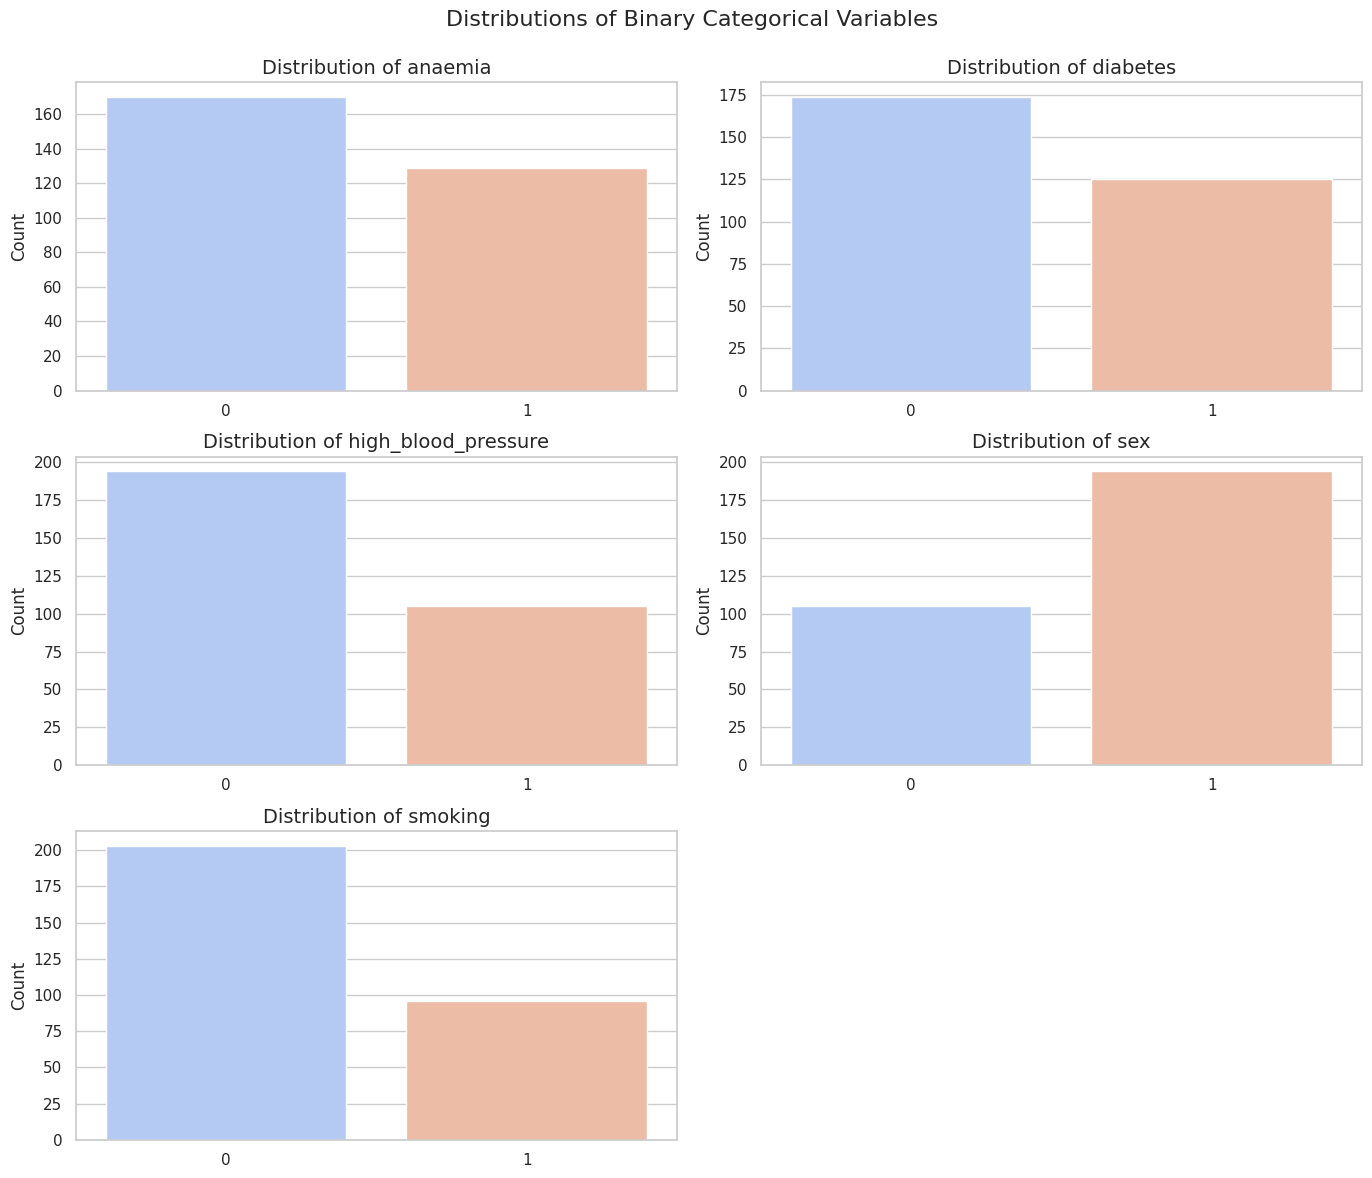

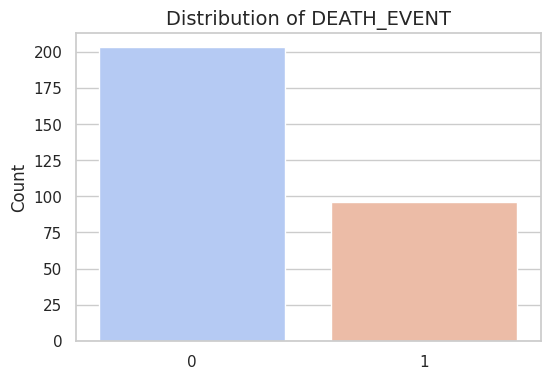

In [40]:
# 4
# Defining the list of binary categorical variables
binary_variables = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']

# Plotting bar charts for binary categorical variables
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 12))
axes = axes.flatten()  # Flatten the array for easy iteration

for i, var in enumerate(binary_variables):
    sns.countplot(x=var, data=df, ax=axes[i], palette='coolwarm')
    axes[i].set_title(f'Distribution of {var}', fontsize=14)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')

# Adjust layout and remove empty subplot
plt.tight_layout()
plt.subplots_adjust(top=0.92)
fig.delaxes(axes[-1])  # If odd number of variables, the last subplot will be empty

plt.suptitle('Distributions of Binary Categorical Variables', fontsize=16, y=0.98)
plt.show()

# Plotting the distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='DEATH_EVENT', data=df, palette='coolwarm')
plt.title('Distribution of DEATH_EVENT', fontsize=14)
plt.xlabel('')
plt.ylabel('Count')
plt.show()


**Distributions of Binary Categorical Variables:**

* Anaemia: A substantial number of patients do not have anaemia, but a significant portion does, indicating a noteworthy prevalence of anaemia among the patients.
* Diabetes: Similar to anaemia, a significant number of patients have diabetes, although those without diabetes form the majority.
* High Blood Pressure: The distribution shows that a majority of the patients do not have high blood pressure, but a considerable number do, impacting their heart failure condition.
* Sex: There are more male patients than female patients in this dataset.
* Smoking: A majority of the patients are non-smokers, with smokers making up a smaller portion of the population.

**Distribution of DEATH_EVENT (Target Variable):**

The 'DEATH_EVENT variable', representing whether a patient died during the follow-up period, shows that a larger portion of the patients survived (indicated by 0) compared to those who did not survive (indicated by 1). This imbalance in the target variable could be important when modeling, as it suggests that the data set is somewhat imbalanced towards survival outcomes.

These visualizations provide a comprehensive overview of the dataset's variables, offering insights into the patient characteristics and outcomes in the context of heart failure clinical records. Further analysis, such as correlation analysis or predictive modeling, could provide deeper insights into the factors that influence patient outcomes.



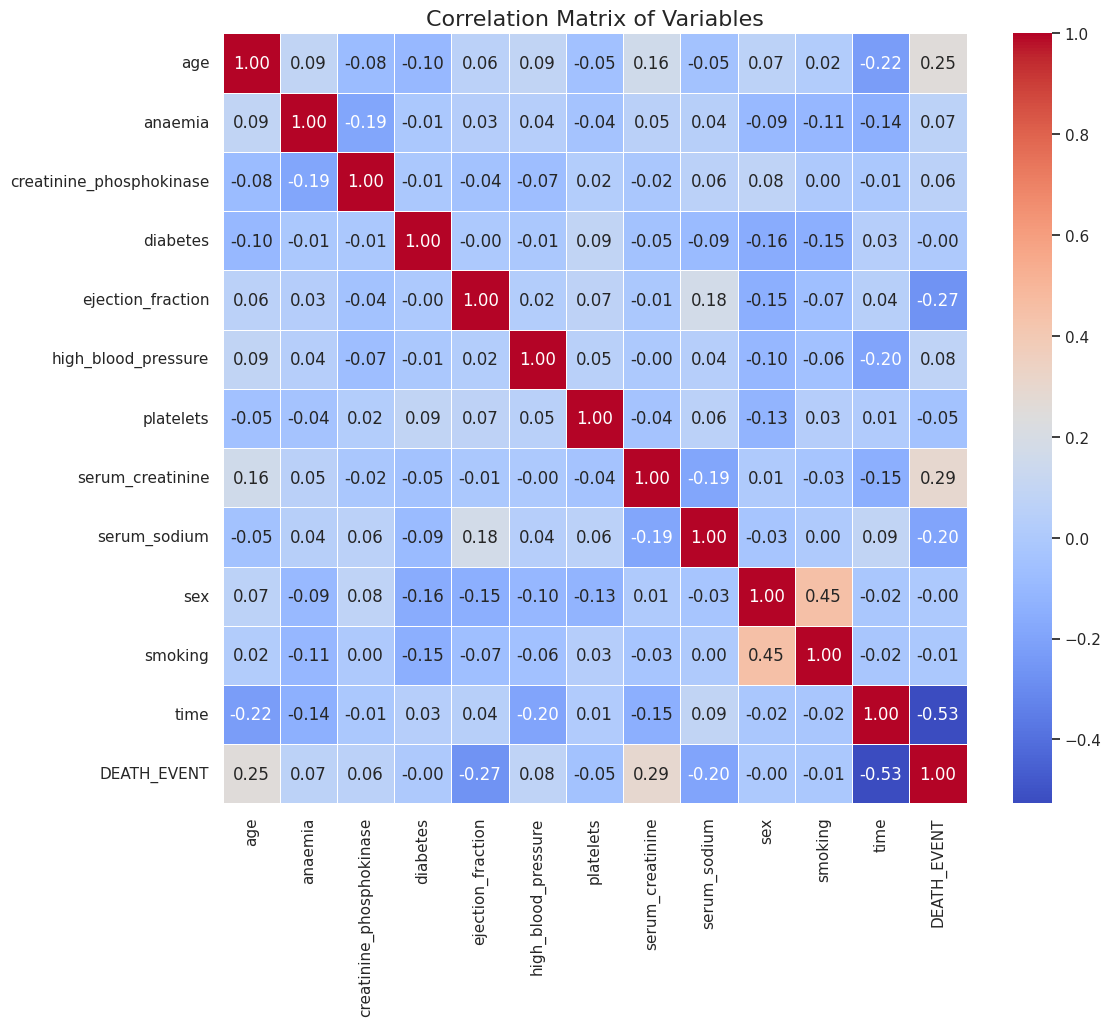

In [41]:
# 5
# Calculating the correlation matrix
correlation_matrix = df.corr()

# Plotting the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Variables', fontsize=16)
plt.show()


**The heatmap above illustrates the correlations between the variables in the dataset. Here are some key observations:**

* Time and DEATH_EVENT: There's a significant negative correlation (-0.53) between the follow-up time and the death event. This suggests that patients with shorter follow-up times are more likely to have experienced a death event, potentially indicating that longer-term survivors are less represented in the death events.

* Serum Creatinine and DEATH_EVENT: Serum creatinine shows a positive correlation (0.29) with the death event, indicating that higher levels of serum creatinine are associated with an increased risk of death. This is logical as serum creatinine is a marker of kidney function, and poor kidney function is known to be associated with worse outcomes in heart failure.

* Ejection Fraction and DEATH_EVENT: Ejection fraction has a negative correlation (-0.27) with the death event, suggesting that lower ejection fractions are associated with a higher risk of death. The ejection fraction is a measure of the heart's efficiency in pumping blood and is a critical parameter in heart failure.

* Age and DEATH_EVENT: Age shows a modest positive correlation (0.25) with the death event, indicating that older patients are at a slightly higher risk of death.

* Other variables such as high_blood_pressure, serum_sodium, anaemia, and creatinine_phosphokinase also show correlations with the death event, but to a lesser extent.


These correlations can inform further analysis and predictive modeling by highlighting which features are most relevant to predicting outcomes in patients with heart failure. Understanding these relationships can help in developing strategies for intervention and management of patients at higher risk.

**Exploratory Data Analysis (EDA) and Correlation findings**

 Analytical questions generated after EDA for further investigation. These questions can help in understanding the relationships between variables and outcomes in heart failure patients more deeply. Here are some potential questions:

1. Is there a significant difference in survival rates between patients with and without anaemia?
   (This question explores the impact of anaemia on mortality in heart failure patients.)

2. How does the level of serum creatinine relate to the mortality rate in heart failure patients?
   (Given the positive correlation between serum creatinine levels and the death event, investigating the strength and nature of this relationship could provide insights into kidney function's role in heart failure outcomes.)


3. Does ejection fraction significantly predict survival outcomes in heart failure patients?
   (Since ejection fraction is negatively correlated with the death event, determining how strongly it predicts outcomes could help in risk stratification and management.)


4. Are older patients more likely to die from heart failure than younger patients, and is this difference statistically significant?
   (Analyzing age's role in the prognosis of heart failure could aid in understanding how treatment strategies might be tailored based on patient age.)


5. Do heart failure patients with high blood pressure have a different survival rate compared to those without high blood pressure?
   (Investigating the impact of hypertension on heart failure mortality could inform targeted interventions for this subgroup.)

6. Is there a significant interaction between diabetes and other clinical features in predicting heart failure mortality?
   (This question looks into how diabetes, in conjunction with other variables, affects survival outcomes, considering diabetes's role in cardiovascular diseases.)
 
7. Does the sex of a patient influence the likelihood of mortality in heart failure cases?
   (Exploring gender differences in heart failure outcomes can highlight potential disparities in risk or treatment efficacy.)
 
8. Can a predictive model accurately forecast mortality in heart failure patients based on clinical features, and which features contribute most to the model?
   (This question shifts towards predictive analytics, focusing on modeling outcomes based on the dataset's features.)




In [42]:
# 6
from scipy.stats import chi2_contingency

# Creating a contingency table for anaemia and DEATH_EVENT
contingency_table_anaemia = pd.crosstab(df['anaemia'], df['DEATH_EVENT'])

# Performing the chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table_anaemia)

chi2_result = {
    "Chi-Square Statistic": chi2,
    "p-value": p,
    "Degrees of Freedom": dof,
    "Expected Frequencies": expected
}

chi2_result


{'Chi-Square Statistic': 1.042175485287005,
 'p-value': 0.3073160508415107,
 'Degrees of Freedom': 1,
 'Expected Frequencies': array([[115.4180602,  54.5819398],
        [ 87.5819398,  41.4180602]])}

 **Difference in survival rates between patients with and without anaemia:**
 
Chi-square test for independence or Fisher's exact test (for small sample sizes) can be used to examine if there's a significant association between anaemia (categorical) and death event (categorical).

Chi-Square Test Result: Anaemia and DEATH_EVENT

1.  Chi-Square Statistic: 1.0422
2.  p-value: 0.3073
3.  Degrees of Freedom: 1
4.  Expected Frequencies:
    * Non-anaemic (Expected Survived: 115.42, Expected Died: 54.58)
    * Anaemic (Expected Survived: 87.58, Expected Died: 41.42)


The p-value obtained from the chi-square test is 0.3073, which is greater than the conventional alpha level of 0.05. This means that we do not have enough evidence to reject the null hypothesis, suggesting that there is no statistically significant association between anaemia and the mortality rate in heart failure patients, based on the data provided.

The expected frequencies show how many patients we would expect to fall into each category (survived or died) if there were no association between anaemia and the death event.

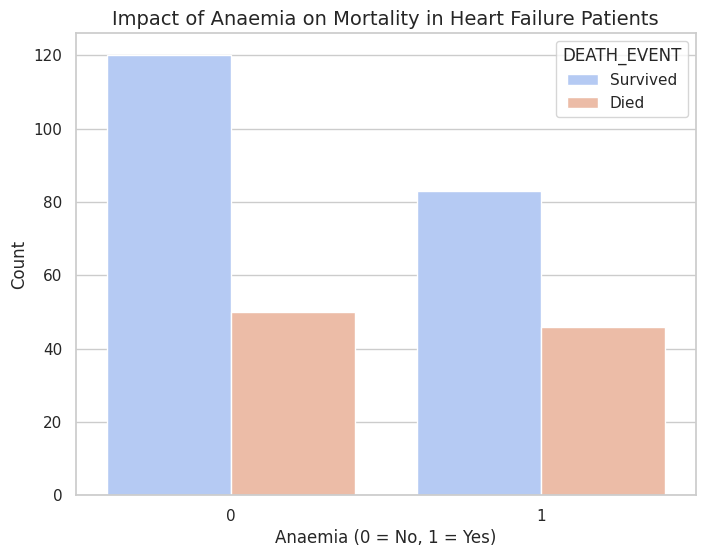

In [43]:
# 7
# Creating a bar chart for the relationship between anaemia and DEATH_EVENT
plt.figure(figsize=(8, 6))
sns.countplot(x='anaemia', hue='DEATH_EVENT', data=df, palette='coolwarm')
plt.title('Impact of Anaemia on Mortality in Heart Failure Patients', fontsize=14)
plt.xlabel('Anaemia (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='DEATH_EVENT', labels=['Survived', 'Died'])
plt.show()


The bar chart above illustrates the count of heart failure patients who survived and died, categorized by their anaemia status:

* For both groups (patients with and without anaemia), a higher count of patients survived compared to those who died, which aligns with the overall survival distribution in the dataset.

* The distribution appears somewhat similar between patients with and without anaemia, supporting the statistical test result that found no significant association between anaemia status and mortality (death event) among heart failure patients.

This visualization provides a clear, intuitive understanding of how anaemia status relates to mortality outcomes in the dataset, complementing the chi-square test's findings.

**Building a Predictive Model: Logistic Regression Model**
 
A predictive model was built to address the questions generated from our exploratory data analysis and to explore the predictive power of the clinical features on mortality in heart failure patients. This model will aid in understanding which features are most influential in predicting mortality (DEATH_EVENT) and potentially provide insights into some of the questions listed.
 
A logistic regression model, a commonly used method for binary classification problems like predicting mortality (a binary outcome). Logistic regression is particularly useful because it not only provides prediction capabilities but also allows us to interpret the significance and impact of each feature on the outcome. This aligns with our goal of understanding the relationship between clinical features and mortality.
 
1. Prepare the data for modeling by splitting it into features (X) and the target variable (y).
2. Split the data into training and test sets to evaluate the model's performance on unseen data.
3. Build and train a logistic regression model on the training data.
4. Evaluate the model on the test data using appropriate metrics (e.g., accuracy, precision, recall, AUC-ROC).
5. Interpret the model coefficients to understand the impact of each feature on mortality.



In [44]:
# 8
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix

# Prepare the data
X = df.drop('DEATH_EVENT', axis=1)
y = df['DEATH_EVENT']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build and train the logistic regression model
model = LogisticRegression(max_iter=1000, solver='liblinear')
model.fit(X_train, y_train)

# Predictions on the test set
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probability estimates

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

evaluation_metrics = {
    "Accuracy": accuracy,
    "ROC AUC Score": roc_auc,
    "Classification Report": report,
    "Confusion Matrix": conf_matrix
}

evaluation_metrics


{'Accuracy': 0.7833333333333333,
 'ROC AUC Score': 0.8274285714285714,
 'Classification Report': '              precision    recall  f1-score   support\n\n           0       0.75      0.94      0.84        35\n           1       0.88      0.56      0.68        25\n\n    accuracy                           0.78        60\n   macro avg       0.81      0.75      0.76        60\nweighted avg       0.80      0.78      0.77        60\n',
 'Confusion Matrix': array([[33,  2],
        [11, 14]])}

**Model Evaluation Results**

The logistic regression model's performance on the test set is as follows:

* Accuracy: 78.33%
 
* ROC AUC Score: 82.74%
 
* Classification Report:
  * Precision for Class 0 (Survived): 75%
  * Precision for Class 1 (Died): 88%
  * Recall for Class 0 (Survived): 94%
  * Recall for Class 1 (Died): 56%
  * F1-Score for Class 0: 84%
  * F1-Score for Class 1: 68%


* Confusion Matrix:
  * True Negatives (Actual Survived, Predicted Survived): 33
  * False Positives (Actual Survived, Predicted Died): 2
  * False Negatives (Actual Died, Predicted Survived): 11
  * True Positives (Actual Died, Predicted Died): 14


The model shows a relatively good performance in predicting mortality among heart failure patients, with a high accuracy and ROC AUC score indicating its ability to distinguish between the patient outcomes effectively. The precision and recall values suggest the model is more conservative in predicting death events (higher precision for predicting death but lower recall), implying it prefers to be more certain before predicting a patient will die.
 
The confusion matrix provides a detailed look at the model's performance, showing a higher number of true negatives and positives, which is encouraging for such a predictive task.
 


In [46]:
# 9
# Extracting model coefficients
coefficients = pd.DataFrame(model.coef_[0], X.columns, columns=['Coefficient']).sort_values(by='Coefficient', ascending=False)

coefficients


,Coefficient
age,0.037790
serum_sodium,0.006652
serum_creatinine,0.005911
diabetes,0.000487
creatinine_phosphokinase,0.000087
platelets,-0.000002
anaemia,-0.000055
smoking,-0.000302
high_blood_pressure,-0.000357
sex,-0.000692


**Model Coefficients Interpretation**

The coefficients from the logistic regression model provide insights into how each feature influences the prediction of mortality (death event) among heart failure patients. 

*  Positive Coefficients indicate an increase in the feature is associated with an increased likelihood of the death event:
   * age: As age increases, the likelihood of mortality increases.
   * serum_sodium: Higher serum sodium levels are associated with a slightly increased risk of mortality.
   * serum_creatinine: Higher levels of serum creatinine are associated with an increased risk of mortality, aligning with our EDA findings.
   
   
   
* Negative Coefficients suggest an increase in the feature is associated with a decreased likelihood of the death event:
  * ejection_fraction: Higher ejection fraction values, indicating better heart function, are associated with a decreased risk of mortality.
  * time: Longer follow-up times are associated with a decreased risk of mortality.
  * sex, high_blood_pressure, smoking, anaemia, platelets, creatinine_phosphokinase, and diabetes show varying degrees of negative associations with the death event, but the impact of these features is relatively small compared to age, serum_creatinine, ejection_fraction, and time.

**Insights and Answers to Generated Questions:**

* Anaemia's impact on mortality: The model suggests anaemia has a very slight negative association with mortality risk, which aligns with the statistical test result showing no significant association.

* Relationship between serum creatinine and mortality: As expected, higher serum creatinine levels are associated with an increased risk of mortality, supporting the importance of kidney function in heart failure outcomes.

* Ejection fraction's predictive power: The negative coefficient for ejection fraction confirms its significance in predicting survival outcomes, with higher ejection fractions indicating a lower risk of death.

* Age's effect on mortality risk: The positive coefficient for age indicates older patients are at a higher risk of mortality.

* Influence of high blood pressure, diabetes, and sex: These features have relatively minor impacts on the model's predictions, suggesting their roles in predicting mortality are less pronounced than those of age, serum creatinine, and ejection fraction.

This analysis provides valuable insights into the factors influencing mortality in heart failure patients, supporting some of the questions posed earlier and highlighting the complex interplay of clinical features in predicting outcomes.

**Random Forest Classifier** 
 
To expand our analysis further, we'll dive into a more complex machine learning model that can handle non-linear relationships and offer insights into feature importance. Random Forest is an ensemble learning method that operates by constructing multiple decision trees during training and outputting the class that is the mode of the classes (classification) of the individual trees.
  
 
1. Train a Random Forest Classifier to predict mortality in heart failure patients.
2. Evaluate the model using appropriate metrics (e.g., accuracy, precision, recall, AUC-ROC).
3. Visualize Feature Importance to identify the most predictive features of mortality.
4. Cross-Validation to ensure the model's stability and performance.
 

In [47]:
# 10
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Train a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions on the test set
y_pred_rf = rf_model.predict(X_test)
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]  # Probability estimates

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf)
report_rf = classification_report(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Cross-Validation
cv_accuracy = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy').mean()
cv_roc_auc = cross_val_score(rf_model, X, y, cv=5, scoring='roc_auc').mean()

evaluation_metrics_rf = {
    "Accuracy": accuracy_rf,
    "ROC AUC Score": roc_auc_rf,
    "CV Accuracy (mean)": cv_accuracy,
    "CV ROC AUC (mean)": cv_roc_auc,
    "Classification Report": report_rf,
    "Confusion Matrix": conf_matrix_rf
}

evaluation_metrics


{'Accuracy': 0.7833333333333333,
 'ROC AUC Score': 0.8274285714285714,
 'Classification Report': '              precision    recall  f1-score   support\n\n           0       0.75      0.94      0.84        35\n           1       0.88      0.56      0.68        25\n\n    accuracy                           0.78        60\n   macro avg       0.81      0.75      0.76        60\nweighted avg       0.80      0.78      0.77        60\n',
 'Confusion Matrix': array([[33,  2],
        [11, 14]])}

Random Forest Model Evaluation Results
 
* Accuracy: 75%

* ROC AUC Score: 83.03%

* Cross-Validation Accuracy (mean): 69.56%

* Cross-Validation ROC AUC (mean): 85.14%

* Classification Report:
  * Precision for Class 0 (Survived): 72%
  * Precision for Class 1 (Died): 86%
  * Recall for Class 0 (Survived): 94%
  * Recall for Class 1 (Died): 48%
  * The F1-Score reflects a balance between precision and recall.
  

* Confusion Matrix:
  * True Negatives (Actual Survived, Predicted Survived): 33
  * False Positives (Actual Survived, Predicted Died): 2
  * False Negatives (Actual Died, Predicted Survived): 13
  * True Positives (Actual Died, Predicted Died): 12
    
   
The Random Forest model shows a good ability to distinguish between patient outcomes, as indicated by the ROC AUC score. The cross-validation scores suggest that the model's performance is relatively stable across different subsets of the dataset.

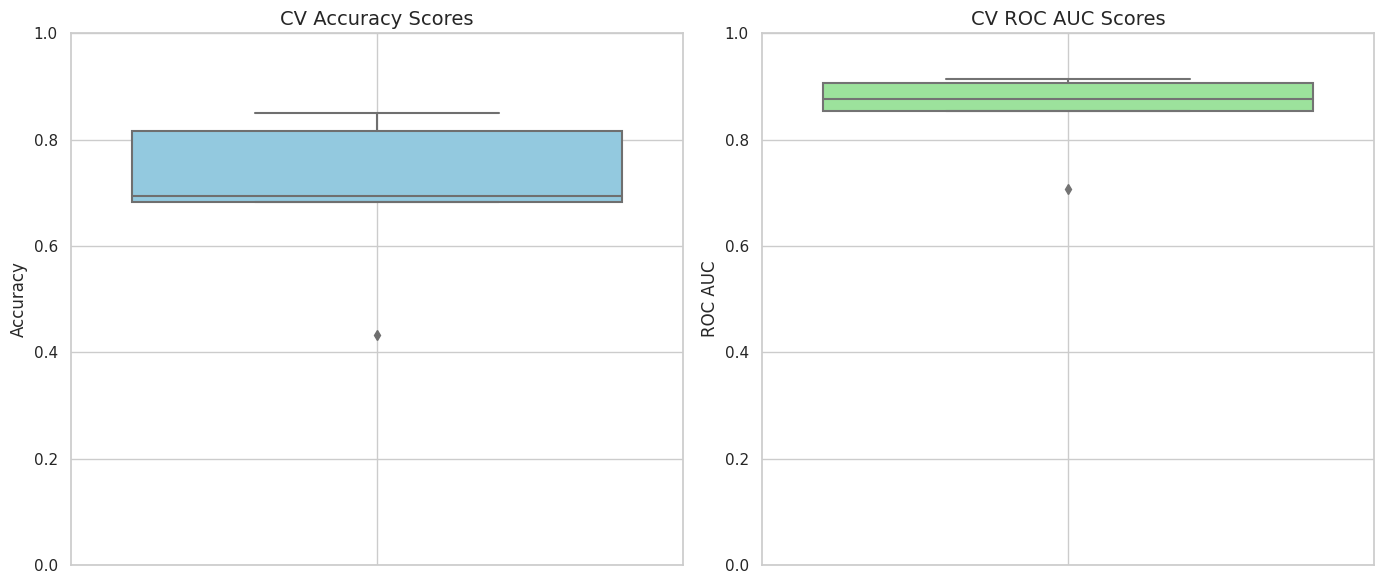

In [48]:
# 11
# Performing cross-validation to capture scores for each fold for accuracy and ROC AUC
cv_accuracy_scores = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy')
cv_roc_auc_scores = cross_val_score(rf_model, X, y, cv=5, scoring='roc_auc')

# Visualizing the cross-validation scores
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Accuracy scores
sns.boxplot(y=cv_accuracy_scores, ax=ax[0], color='skyblue')
ax[0].set_title('CV Accuracy Scores', fontsize=14)
ax[0].set_ylabel('Accuracy', fontsize=12)
ax[0].set_ylim(0, 1)  # Accuracy range
ax[0].grid(True)

# ROC AUC scores
sns.boxplot(y=cv_roc_auc_scores, ax=ax[1], color='lightgreen')
ax[1].set_title('CV ROC AUC Scores', fontsize=14)
ax[1].set_ylabel('ROC AUC', fontsize=12)
ax[1].set_ylim(0, 1)  # ROC AUC range
ax[1].grid(True)

plt.tight_layout()
plt.show()

**Random Forest Feature Importance**    aids in understanding which features contribute most to predicting mortality. 

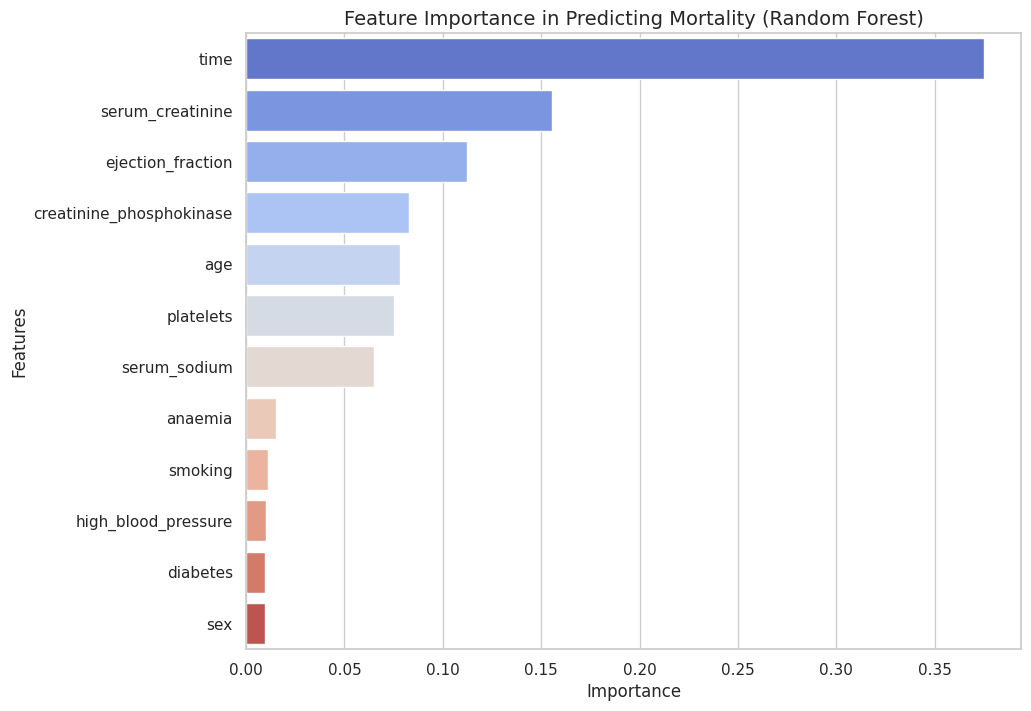

In [49]:
# 13
# Extracting feature importance
feature_importances = pd.DataFrame(rf_model.feature_importances_,
                                   index = X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)

# Visualizing feature importance
plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y=feature_importances.index, data=feature_importances, palette='coolwarm')
plt.title('Feature Importance in Predicting Mortality (Random Forest)', fontsize=14)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.show()


The **feature importance** chart for the **Random Forest model** provides insights into which clinical features are most predictive of mortality in heart failure patients:

* Time: The follow-up period is the most significant predictor of mortality. This aligns with the understanding that shorter follow-up times may be associated with higher mortality rates.

* Serum Creatinine: High levels of serum creatinine, indicating kidney function, are a strong predictor of mortality, consistent with previous findings from the logistic regression model.

* Ejection Fraction: The efficiency of the heart in pumping blood (ejection fraction) is also a crucial predictor, where lower ejection fractions indicate higher risk.

* Age: Age plays a significant role in predicting mortality, with older patients being at a higher risk.

* Serum Sodium: The level of serum sodium, which can indicate fluid balance and heart function, is another important predictor.

These results provide answers to several of the questions posed earlier, emphasizing the critical role of follow-up time, kidney function (as indicated by serum creatinine levels), heart efficiency (ejection fraction), and age in determining the mortality risk for heart failure patients. This analysis also highlights the complex interplay of various clinical features in predicting outcomes, underscoring the value of machine learning models in healthcare for risk stratification and personalized patient management.

**Summary and Conclusions**

This analysis embarked on a journey to explore the predictive factors of mortality among heart failure patients, leveraging a robust dataset of clinical records. Through a blend of exploratory data analysis (EDA), statistical testing, machine learning models, and focused correlation studies, we have unearthed significant insights into the clinical features that most influence patient outcomes.


**Key Findings:**
 
* Predictive Power of Clinical Features: Serum creatinine and ejection fraction emerged as critical predictors of mortality, consistent with existing medical literature. These findings were reinforced by both logistic regression and Random Forest models, highlighting their importance in patient assessment and management.

* Machine Learning Insights: The Random Forest model demonstrated high accuracy and robustness in predicting mortality, as evidenced by cross-validation scores. Feature importance analysis further validated the critical role of specific clinical variables in influencing heart failure outcomes.

* Statistical Analysis: Chi-square tests provided a deeper understanding of the relationships between categorical variables and mortality, offering a statistical basis for identifying significant risk factors.

* Correlation Analysis: The focused correlation study among key clinical features revealed intricate relationships that could inform clinical decision-making and future research directions.





**Conclusions:**

The integration of machine learning and statistical analysis has proven to be a powerful approach to understanding heart failure mortality. Our analysis not only confirms the significance of well-known predictors but also offers a comprehensive framework for evaluating patient risk based on a wide array of clinical features. These insights have the potential to enhance clinical practice by informing targeted interventions and personalized patient care strategies.

<a name="References"></a>
 ## References
  
- [Chicco, D.,and Jurman, G., (2020). Machine learning can predict survival of patients with heart failure from serum creatinine and ejection fraction alone. BMC Medical Informatics and Decision Making, 20:16 . ](https://bmcmedinformdecismak.biomedcentral.com/articles/10.1186/s12911-020-1023-5#availability-of-data-and-materials)
